A common approach to building deep learning networks for small datasets is to use pretrained networks. We will use a CNN, that is using VGG16 architecture, and trained on the ImageNet dataset

### 1. Load the VGG Model

In [11]:
import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import numpy as np
import os

conv_base = VGG16(weights = 'imagenet')

In [2]:
conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### 2. Load and prepare images
First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.

In [3]:
### show the list of demo images I have

Let's create a function to predict category

In [12]:
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def predict_image(image_url, m):
  loadimg = image.load_img(image_url, target_size=(224, 224))
  #convert to numpy array for Keras image formate processing
  x = image.img_to_array(loadimg)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = m.predict(x)

  # convert the probabilities to class labels
  label = decode_predictions(preds)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  print('%s (%.2f%%)' % (label[1], label[2]*100))

In [13]:
import os

img_folder = "images/single_images/"
for filename in os.listdir(img_folder):
      img_path = os.path.join(img_folder,filename)
      print ('processing image:', img_path)
      predict_image(img_path, conv_base)

processing image: images/single_images/Bicycle.jpg
bicycle-built-for-two (71.81%)
processing image: images/single_images/Brockmans.jpg
beer_glass (14.84%)
processing image: images/single_images/Cat.jpg
dingo (64.98%)
processing image: images/single_images/Coffee.jpg
espresso (98.74%)
processing image: images/single_images/Tank.jpg
tank (87.44%)
processing image: images/single_images/TowerBridge.jpg
suspension_bridge (94.79%)


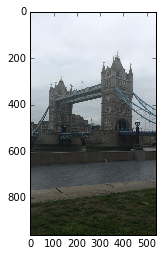

suspension_bridge (94.79%)


In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display_image(url):
  img = mpimg.imread(url)
  plt.imshow(img)
  plt.show()
  display()

img_path = os.path.join(img_folder,'TowerBridge.jpg')  #TowerBridge 
display_image(img_path)
predict_image(img_path, conv_base)

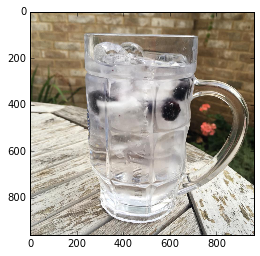

beer_glass (14.84%)


In [16]:
img_path = os.path.join(img_folder,'Brockmans.jpg')  #Brockmans 
display_image(img_path)
predict_image(img_path, conv_base)

The end!